**Install Library**

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download "alexteboul/diabetes-health-indicators-dataset"
! unzip "diabetes-health-indicators-dataset.zip"

**Import Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


**Data Pre Processing**

In [ ]:
#menghapus variabel yang tidak akan digunakan dalam analisis
data.drop(['AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Education','Income'],axis=1,inplace=True)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0


In [ ]:
#mengecek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  Age                   253680 non-null  float64
dtypes: float64(13)
memory usage: 25.2 MB


In [ ]:
#Cek apakah ada missing data
data.isna().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
Age                     False
dtype: bool

**Eksplorasi dan Visualisasi Data**

In [ ]:
#melihat dimensi data
data.shape

(253680, 13)

In [ ]:
#melihat variabel-variabel pada kolom
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'Age'],
      dtype='object')

In [ ]:
Diabetes=data['Diabetes_012']
Diabetes.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

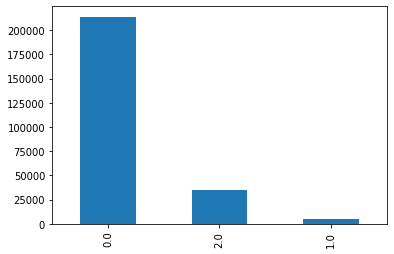

In [ ]:
data["Diabetes_012"].value_counts().plot(kind = "bar")

In [ ]:
BP=data['HighBP']
BP.value_counts()

0.0    144851
1.0    108829
Name: HighBP, dtype: int64

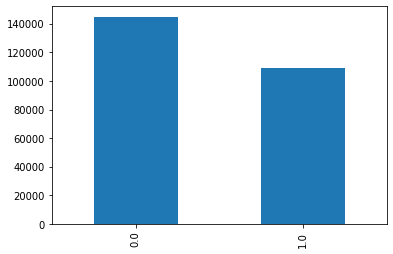

In [ ]:
data["HighBP"].value_counts().plot(kind = "bar")

In [ ]:
chol=data['HighChol']
chol.value_counts()

0.0    146089
1.0    107591
Name: HighChol, dtype: int64

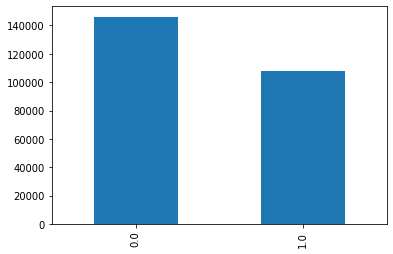

In [ ]:
data["HighChol"].value_counts().plot(kind = "bar")

In [ ]:
check=data['CholCheck']
check.value_counts()

1.0    244210
0.0      9470
Name: CholCheck, dtype: int64

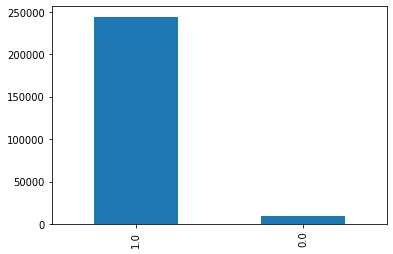

In [ ]:
data["CholCheck"].value_counts().plot(kind = "bar")

In [ ]:
bmi=data['BMI']
bmi.value_counts()

27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64

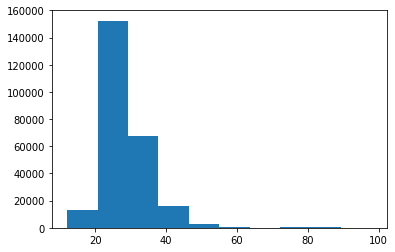

In [ ]:
plt.hist(data['BMI'], bins = 10)
plt.show()

In [ ]:
smoke=data['Smoker']
smoke.value_counts()

0.0    141257
1.0    112423
Name: Smoker, dtype: int64

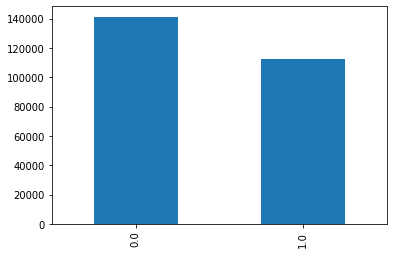

In [ ]:
data["Smoker"].value_counts().plot(kind = "bar")

In [ ]:
stroke=data['Stroke']
stroke.value_counts()

0.0    243388
1.0     10292
Name: Stroke, dtype: int64

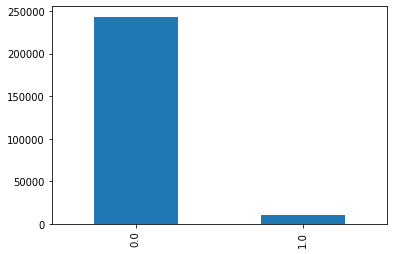

In [ ]:
data["Stroke"].value_counts().plot(kind = "bar")

In [ ]:
heart=data['HeartDiseaseorAttack']
heart.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

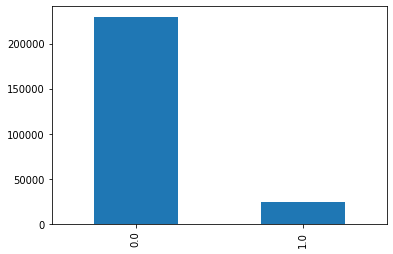

In [ ]:
data["HeartDiseaseorAttack"].value_counts().plot(kind = "bar")

In [ ]:
phys=data['PhysActivity']
phys.value_counts()

1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64

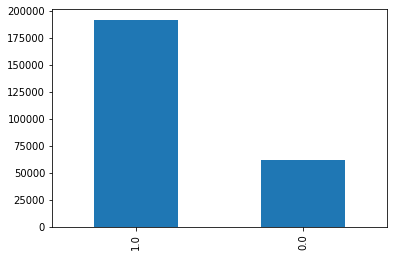

In [ ]:
data["PhysActivity"].value_counts().plot(kind = "bar")

In [ ]:
fruits=data['Fruits']
fruits.value_counts()

1.0    160898
0.0     92782
Name: Fruits, dtype: int64

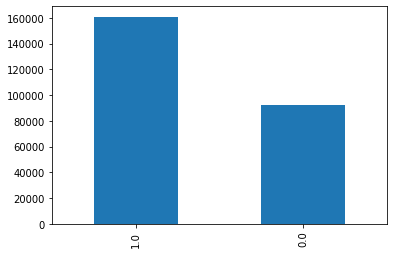

In [ ]:
data["Fruits"].value_counts().plot(kind = "bar")

In [ ]:
veggi=data['Veggies']
veggi.value_counts()

1.0    205841
0.0     47839
Name: Veggies, dtype: int64

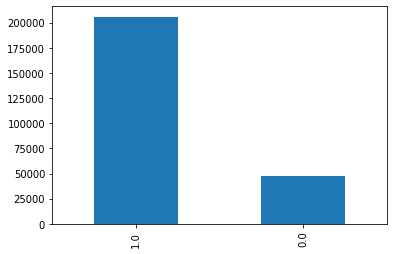

In [ ]:
data["Veggies"].value_counts().plot(kind = "bar")

In [ ]:
alco=data['HvyAlcoholConsump']
alco.value_counts()

0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64

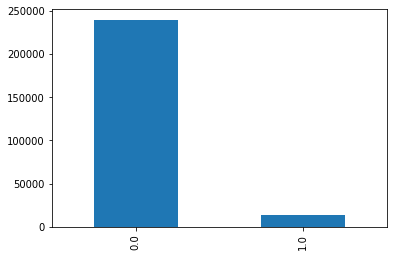

In [ ]:
data["HvyAlcoholConsump"].value_counts().plot(kind = "bar")

In [ ]:
age=data['Age']
age.value_counts()

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64

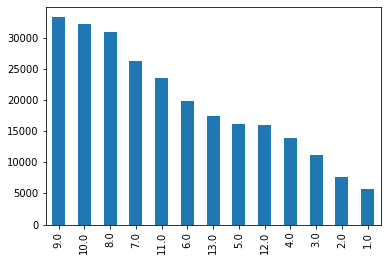

In [ ]:
data["Age"].value_counts().plot(kind = "bar")

**Uji Asumsi**

Kecukupan Sampel

In [ ]:
! pip install factor_analyzer

     |████████████████████████████████| 41 kB 600 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=45c54ddd3467c93957bcd1ee10be2a10f187eb7426b84c5ae3f03de5d5e0dfc3
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
#menghitung p-value uji Bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(215416.16276900278, 0.0)

In [ ]:
from factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [ ]:
kmo_model

0.7098847097359907

No Multikolinearitas

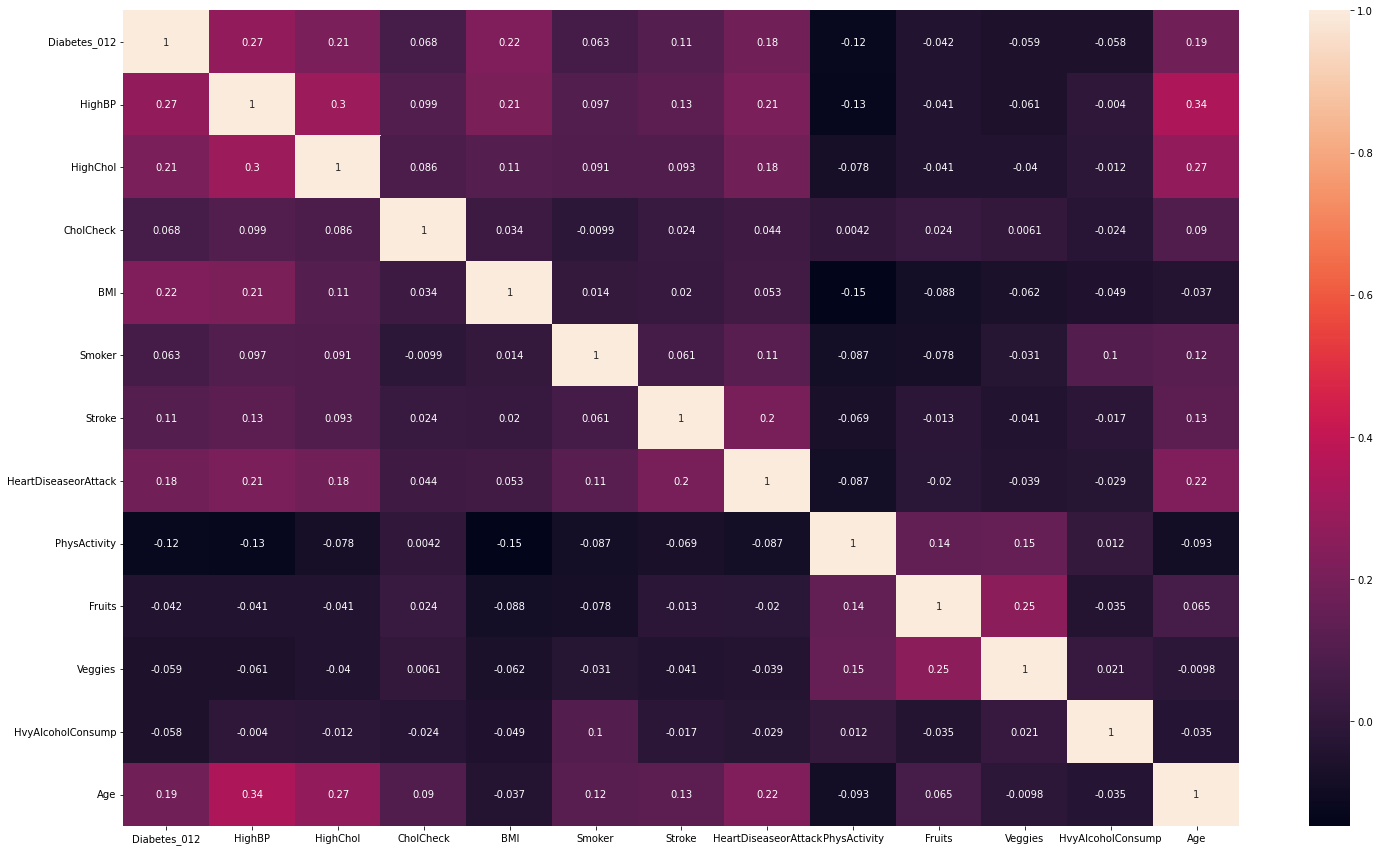

In [ ]:
%matplotlib inline
correlation = data.corr()
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(correlation,annot=True, ax=ax)

**Analysis k-means clustering - silhouette - scaled**

In [ ]:
data_used = data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
n_cluster_check = list(range(2,9,1))
sh_score = []

In [ ]:
for i in n_cluster_check:
 # initialise KMeans
 kmeans = KMeans(init = "random", n_clusters = i, n_init = 10, max_iter = 300,random_state = 134)
 #fit the clusters 
 kmeans.fit(data_used)
 clusters = kmeans.labels_
 print(i)
 
 # silhouette score
 sh_score.append(silhouette_score(data_used, clusters, metric = 'euclidean'))
 print('Silhouette Coefficient: %.3f' % sh_score[-1])

 if sh_score[-1] == max(sh_score):
   best_cluster = clusters

print("Best Silhouette: ", max(sh_score))
print("at ", n_cluster_check[ sh_score.index(max(sh_score)) ], " cluster.")

2
Silhouette Coefficient: 0.456
3
Silhouette Coefficient: 0.339
4
Silhouette Coefficient: 0.315
5
Silhouette Coefficient: 0.300
6
Silhouette Coefficient: 0.290
7
Silhouette Coefficient: 0.290
8
Silhouette Coefficient: 0.279
Best Silhouette:  0.4558252210177268
at  2  cluster.


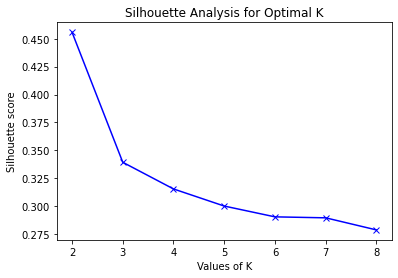

In [ ]:
plt.plot(n_cluster_check,sh_score,'bx-')
plt.xlabel('Number of Clusters (K)') 
plt.ylabel('Avg. Silhouette Coefficient') 
plt.title('Silhouette Coefficient Analysis for Optimal K')
plt.show()

In [ ]:
data_result = data_used
data_result["Cluster"] = best_cluster
data_result

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Age,Cluster
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,1


In [ ]:
data_result["Cluster"].value_counts()

1    192677
0     61003
Name: Cluster, dtype: int64

In [ ]:
data_result.to_csv('/content/gdrive/MyDrive/UTSMining/Clustering_Standar.csv')

Further Analysis

In [ ]:
kmeans = KMeans(init = "random", n_clusters = 2, n_init = 10, max_iter = 300,random_state = 134)
fitmodel = kmeans.fit(data_used)

In [ ]:
data_result = data_used
data_result["Cluster"] = fitmodel.labels_
data_result

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Age,Cluster
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,1


In [ ]:
cent = fitmodel.cluster_centers_
cent1 = cent[0]
cent2 = cent[1]
cent

array([[ 0.55767749,  0.59079062,  0.49338557,  0.97198498, 37.18264676,
         0.45317443,  0.04766979,  0.11878104,  0.65213186,  0.57143091,
         0.77437175,  0.03906365,  7.80461617],
       [ 0.21436394,  0.37777732,  0.40219123,  0.95972015, 25.5961272 ,
         0.44000062,  0.0383232 ,  0.08639848,  0.78960125,  0.65414658,
         0.82314962,  0.06162126,  8.10414839]])

In [ ]:
y = data_result.melt("Cluster")
y

,Cluster,variable,value
0,0,Diabetes_012,0.0
1,1,Diabetes_012,0.0
2,1,Diabetes_012,0.0
3,1,Diabetes_012,0.0
4,1,Diabetes_012,0.0
...,...,...,...
3297835,0,Age,5.0
3297836,1,Age,11.0
3297837,1,Age,2.0
3297838,1,Age,7.0


In [ ]:
data_result

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Age,Cluster
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,1


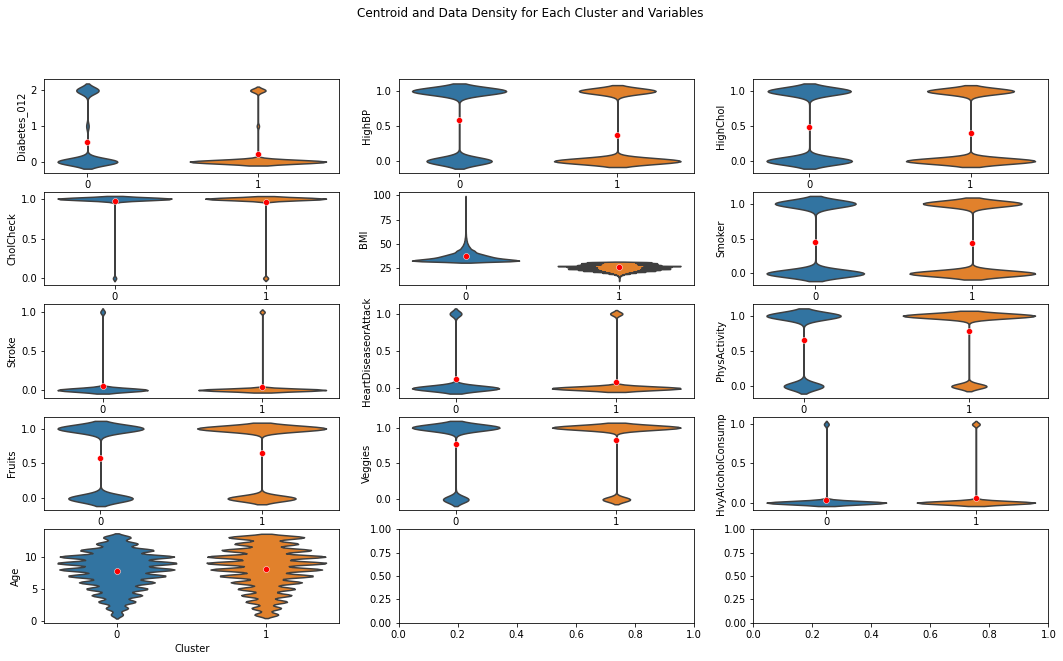

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(18, 10))
fig.suptitle('Centroid and Data Density for Each Cluster and Variables')
iris = sns.load_dataset("iris")

sns.violinplot(ax = axes[0,0], y = "Diabetes_012", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[0,0], x = [0,1], y = [cent1[0],cent2[0]], color = "red")

sns.violinplot(ax = axes[0,1], y = "HighBP", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[0,1], x = [0,1], y = [cent1[1],cent2[1]], color = "red")

sns.violinplot(ax = axes[0,2], y = "HighChol", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[0,2], x = [0,1], y = [cent1[2],cent2[2]], color = "red")

sns.violinplot(ax = axes[1,0], y = "CholCheck", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[1,0], x = [0,1], y = [cent1[3],cent2[3]], color = "red")

sns.violinplot(ax = axes[1,1], y = "BMI", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[1,1], x = [0,1], y = [cent1[4],cent2[4]], color = "red")

sns.violinplot(ax = axes[1,2], y = "Smoker", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[1,2], x = [0,1], y = [cent1[5],cent2[5]], color = "red")

sns.violinplot(ax = axes[2,0], y = "Stroke", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[2,0], x = [0,1], y = [cent1[6],cent2[6]], color = "red")

sns.violinplot(ax = axes[2,1], y = "HeartDiseaseorAttack", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[2,1], x = [0,1], y = [cent1[7],cent2[7]], color = "red")

sns.violinplot(ax = axes[2,2], y = "PhysActivity", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[2,2], x = [0,1], y = [cent1[8],cent2[8]], color = "red")

sns.violinplot(ax = axes[3,0], y = "Fruits", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[3,0], x = [0,1], y = [cent1[9],cent2[9]], color = "red")

sns.violinplot(ax = axes[3,1], y = "Veggies", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[3,1], x = [0,1], y = [cent1[10],cent2[10]], color = "red")

sns.violinplot(ax = axes[3,2], y = "HvyAlcoholConsump", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[3,2], x = [0,1], y = [cent1[11],cent2[11]], color = "red")

sns.violinplot(ax = axes[4,0], y = "Age", data = data_result, x = "Cluster", inner = None)
sns.scatterplot(ax = axes[4,0], x = [0,1], y = [cent1[12],cent2[12]], color = "red")

In [ ]:
colnames = data_used.columns.values.tolist()
centroid = pd.DataFrame(list(zip(colnames, cent1, cent2)), columns = ["Variabel", "Cluster A", "Cluster B"])
print(centroid)
centroid.to_csv('/content/gdrive/MyDrive/UTSMining/Centroid.csv')

                Variabel  Cluster A  Cluster B
0           Diabetes_012   0.557677   0.214364
1                 HighBP   0.590791   0.377777
2               HighChol   0.493386   0.402191
3              CholCheck   0.971985   0.959720
4                    BMI  37.182647  25.596127
5                 Smoker   0.453174   0.440001
6                 Stroke   0.047670   0.038323
7   HeartDiseaseorAttack   0.118781   0.086398
8           PhysActivity   0.652132   0.789601
9                 Fruits   0.571431   0.654147
10               Veggies   0.774372   0.823150
11     HvyAlcoholConsump   0.039064   0.061621
12                   Age   7.804616   8.104148
